## House Sale Prediction

Kaggle's House Sale Prediction dataset for learning Tensorflow.  
More info about the data is <a href="https://www.kaggle.com/harlfoxem/housesalesprediction">here.</a>


### Table of Contents

1. [Imports](#Imports)    
2. [Data](#Data)  
3. [EDA](#EDA)  
  3.1 [Target](#Target)  
  3.2 [Features](#Features)  
4. [Preprocess](#Preprocess)
5. [Model](#Model)  
6. [Evaluation](#Evaluation)  

### Imports

In [1]:
# main
import numpy as np
import pandas as pd
import scipy.stats as stats
import pickle

# datetimes
import datetime as dt
from datetime import datetime
import time

# dataviz
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# plot style
%config InteractiveShellApp.pylab_import_all = False
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 7)

plt.style.use('seaborn-colorblind')

# outline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%precision %.3f

# pandas display
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Data

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Columns    
- id
- date: sold date 
- price
- bedrooms: num of bedrooms
- bathrooms: num of bathrooms
- sqft_living: area of interior living
- sqft_lot: area of the land
- floors: num of floors
- waterfront: 1/0
- view: between 0 and 4, measure for view of the house
- condition: between 1 and 5, measure for the flat's condition
- grade: between 1 and 13
- sqft_above
- sqft_basement
- yr_built: year builted
- yr_renovated: year renovated
- zipcode
- lat: lattitude
- long: longitude
- sqft_living15: area of interior living space for the nearest 15 neighbors
- sqft_lot15: area of the land of the nearest 15 neighbors

### EDA

In [4]:
# no missing rows
df.isna().mean()

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [5]:
df.describe()
df.info()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Target

Text(0.5, 1.0, 'House Price')

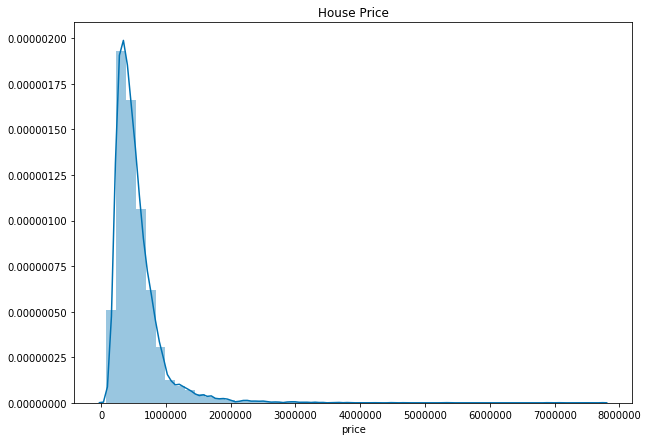

In [6]:
# check target
plt.title('House Price')
sns.distplot(df['price'])

In [7]:
df.price.skew()
df.price.kurt()

4.023364652271239

34.54135857673376

#### Features

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Number of Bedrooms')

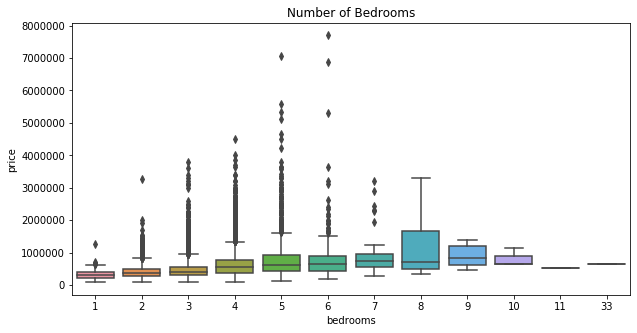

In [8]:
# Bedrooms
plt.figure(figsize=(10,5))
plt.title('Number of Bedrooms')
sns.boxplot(x='bedrooms',y='price',data=df)

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Number of Bathrooms')

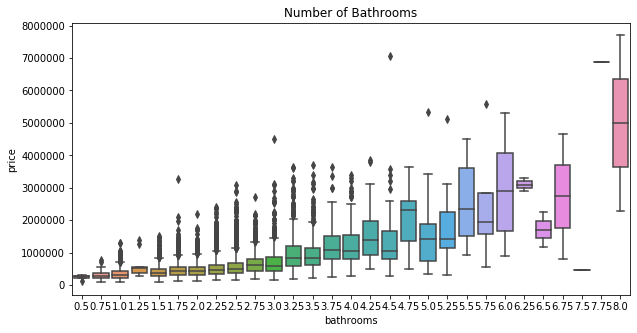

In [9]:
# Bathrooms
plt.figure(figsize=(10,5))
plt.title('Number of Bathrooms')
sns.boxplot(x='bathrooms',y='price',data=df)

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Has waterfront?')

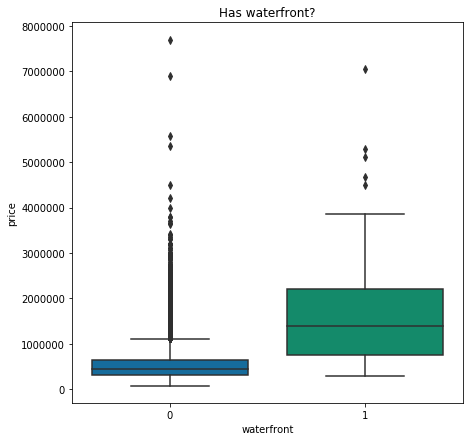

In [10]:
# Waterfront
plt.figure(figsize=(7,7))
plt.title('Has waterfront?')
sns.boxplot(x='waterfront',y='price',data=df)

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Has view?')

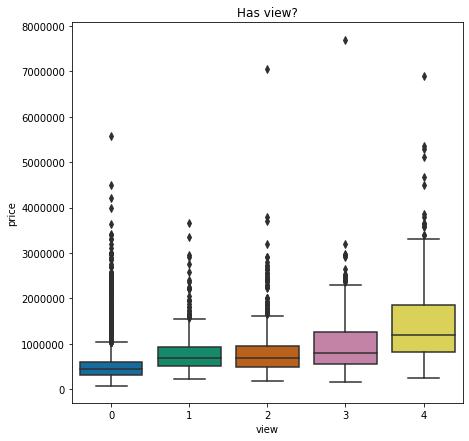

In [11]:
# View
plt.figure(figsize=(7,7))
plt.title('Has view?')
sns.boxplot(x='view',y='price',data=df)

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'In good condition?')

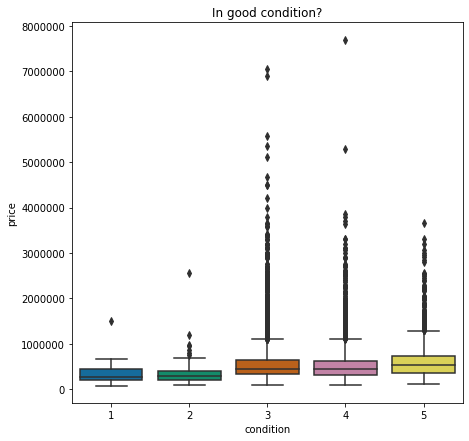

In [12]:
# Condition
plt.figure(figsize=(7,7))
plt.title('In good condition?')
sns.boxplot(x='condition',y='price',data=df)

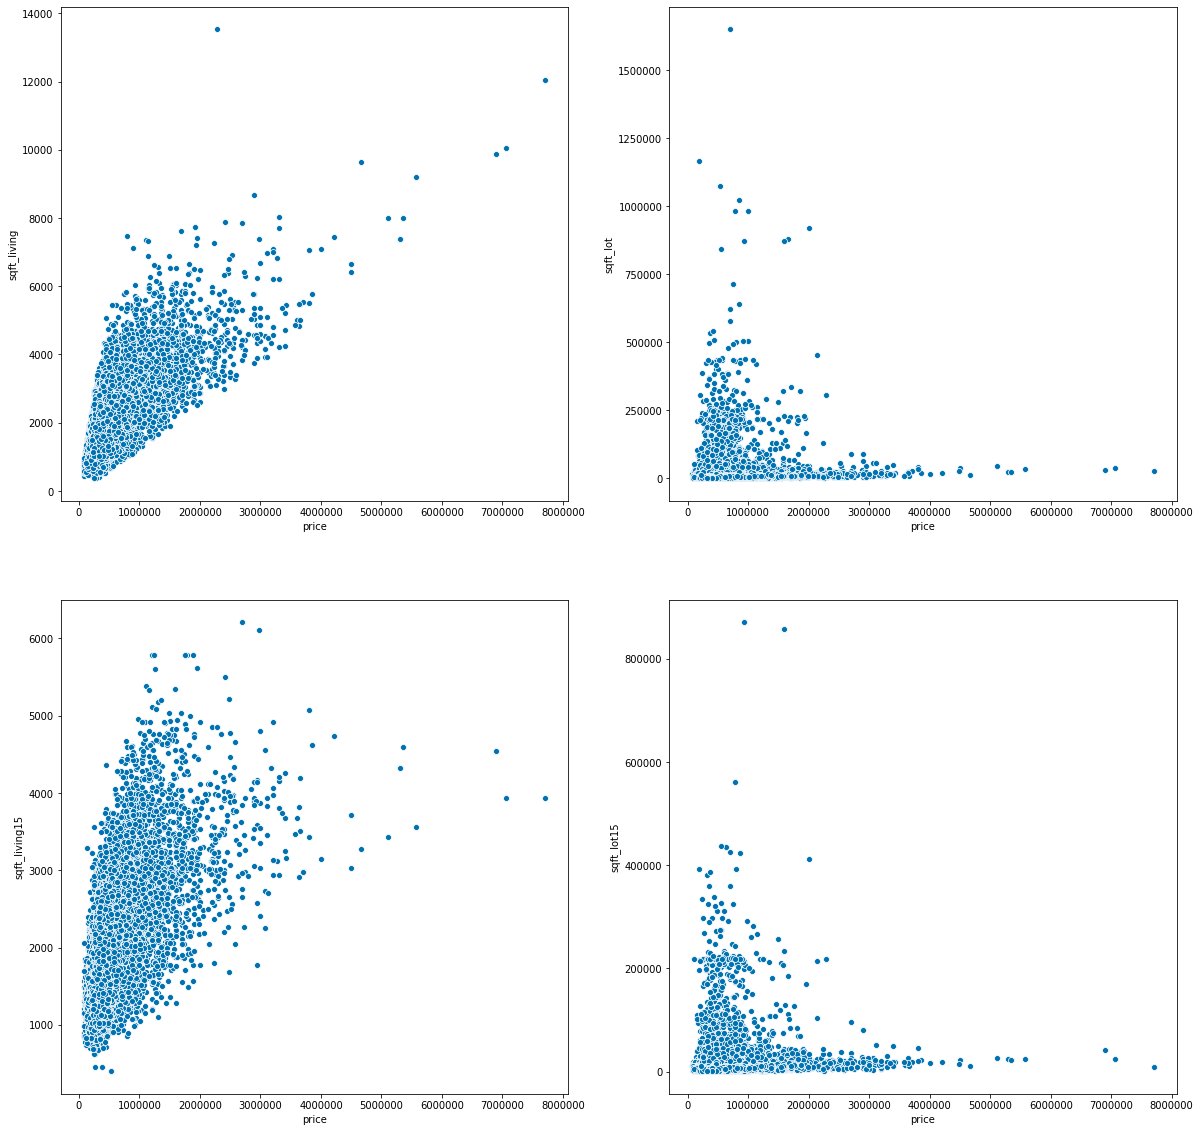

In [13]:
# Area
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.scatterplot(x='price',y='sqft_living',data=df, ax=ax1)
sns.scatterplot(x='price',y='sqft_lot',data=df, ax=ax2)
sns.scatterplot(x='price',y='sqft_living15',data=df, ax=ax3)
sns.scatterplot(x='price',y='sqft_lot15',data=df, ax=ax4)
plt.show()

Text(0.5, 1.0, 'Location of the House')

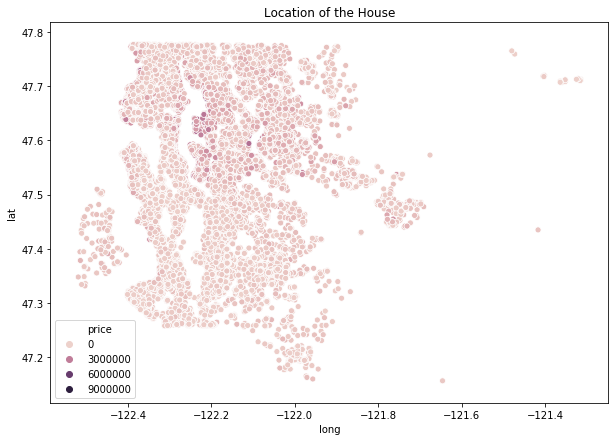

In [14]:
# Location
plt.title('Location of the House')
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [15]:
# Time Series
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df['yearmonth'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df['yearmonth'] = pd.to_datetime(df.yearmonth, format='%Y-%m')

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'House Prices over time')

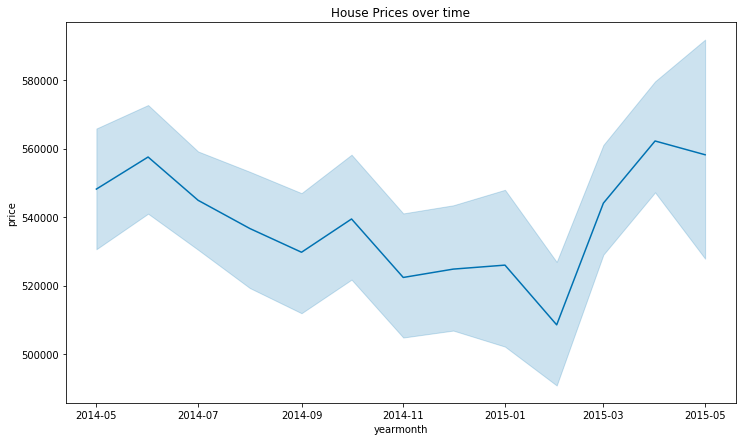

In [16]:
plt.figure(figsize=(12,7))
plt.title('House Prices over time')
sns.lineplot(x='yearmonth',y='price',data=df)

### Preprocess

In [17]:
# drop unnecessary columns
df = df.drop(['id','date','zipcode','yearmonth'],axis=1)

In [18]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [19]:
X = df.drop('price',axis=1)
y = df['price']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,)

In [21]:
# Scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
len(X_train)
len(X_test)

17277

4320

### Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [24]:
# Set model
tf = Sequential()

tf.add(Dense(19,activation='relu'))
tf.add(Dense(19,activation='relu'))
tf.add(Dense(19,activation='relu'))
tf.add(Dense(19,activation='relu'))
tf.add(Dense(1)) #output layer

tf.compile(optimizer='adam',loss='mse')

In [25]:
# Train model
tf.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=128,epochs=400)

Epoch 1/400
135/135 [==============================] - 1s 6ms/step - loss: 426390355968.0000 - val_loss: 428416892928.0000
Epoch 2/400
135/135 [==============================] - 1s 4ms/step - loss: 422316310528.0000 - val_loss: 414074765312.0000
Epoch 3/400
135/135 [==============================] - 1s 4ms/step - loss: 368957652992.0000 - val_loss: 299037097984.0000
Epoch 4/400
135/135 [==============================] - 0s 3ms/step - loss: 197821251584.0000 - val_loss: 114728214528.0000
Epoch 5/400
135/135 [==============================] - 0s 3ms/step - loss: 101455003648.0000 - val_loss: 95304114176.0000
Epoch 6/400
135/135 [==============================] - 0s 3ms/step - loss: 96555900928.0000 - val_loss: 93037166592.0000
Epoch 7/400
135/135 [==============================] - 0s 3ms/step - loss: 94307557376.0000 - val_loss: 90877771776.0000
Epoch 8/400
135/135 [==============================] - 0s 3ms/step - loss: 92049956864.0000 - val_loss: 88518803456.0000
Epoch 9/400
135/135 [==

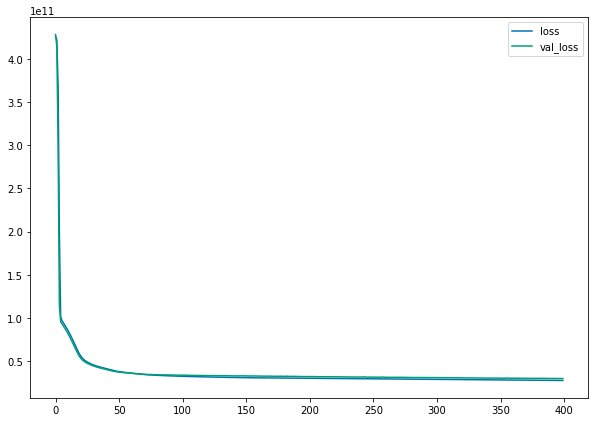

In [26]:
loss = pd.DataFrame(tf.history.history)
loss.plot()

### Evaluation

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
preds = tf.predict(X_test)

In [29]:
print('MAE = ', mean_absolute_error(y_test, preds))
print('MSE = ', mean_squared_error(y_test, preds))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, preds)))
print('R2 = ', r2_score(y_test, preds))

MAE =  105543.06870795356
MSE =  29469661280.02261
RMSE =  171667.29822544134
R2 =  0.7776256221891474
